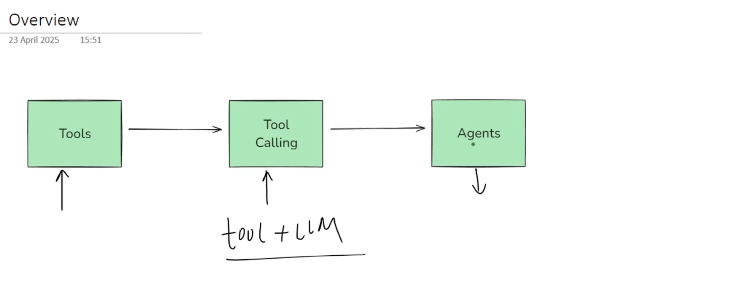

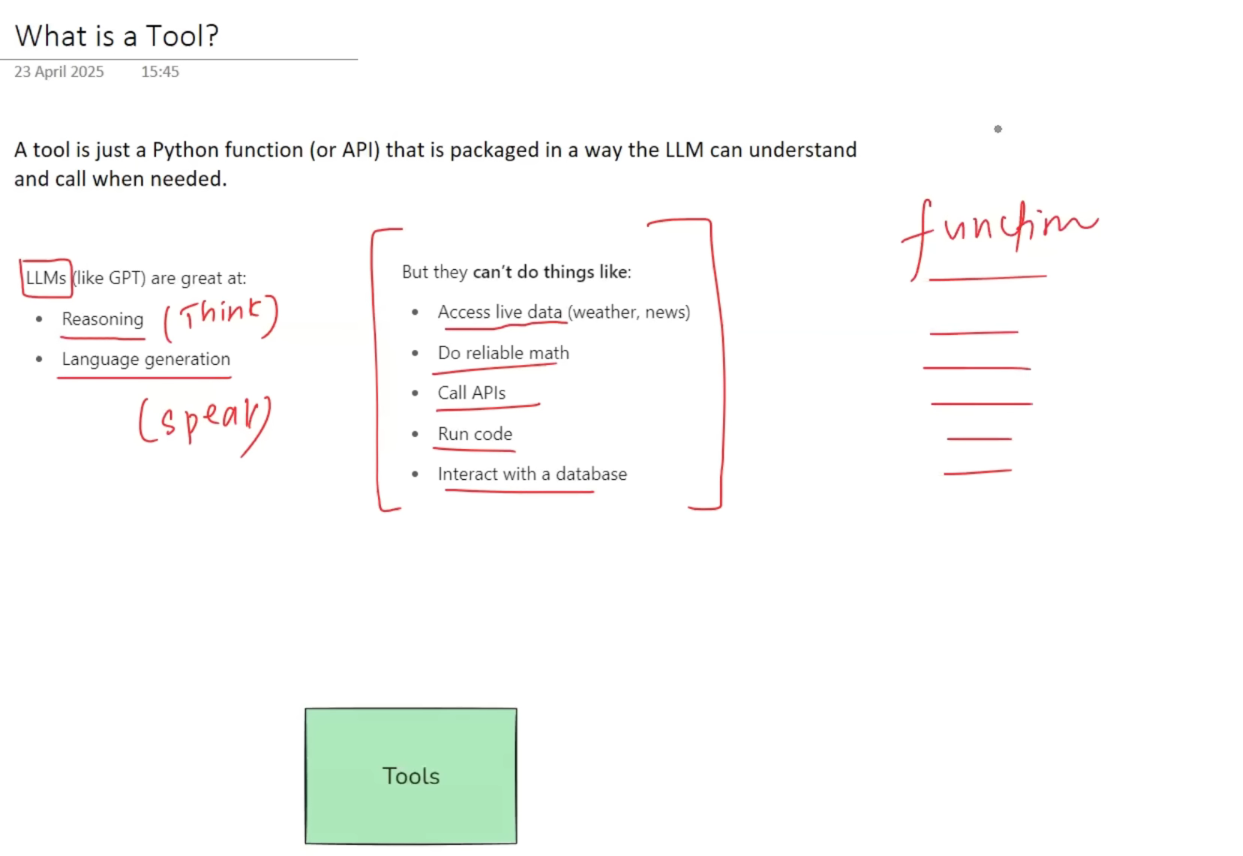

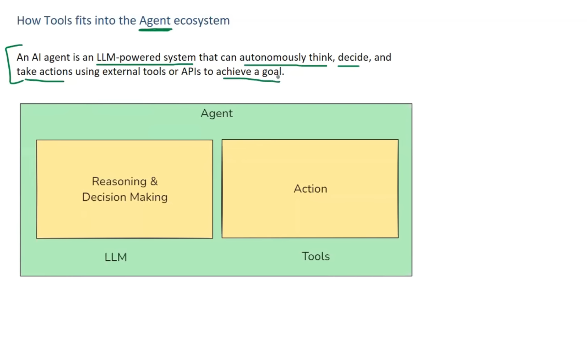


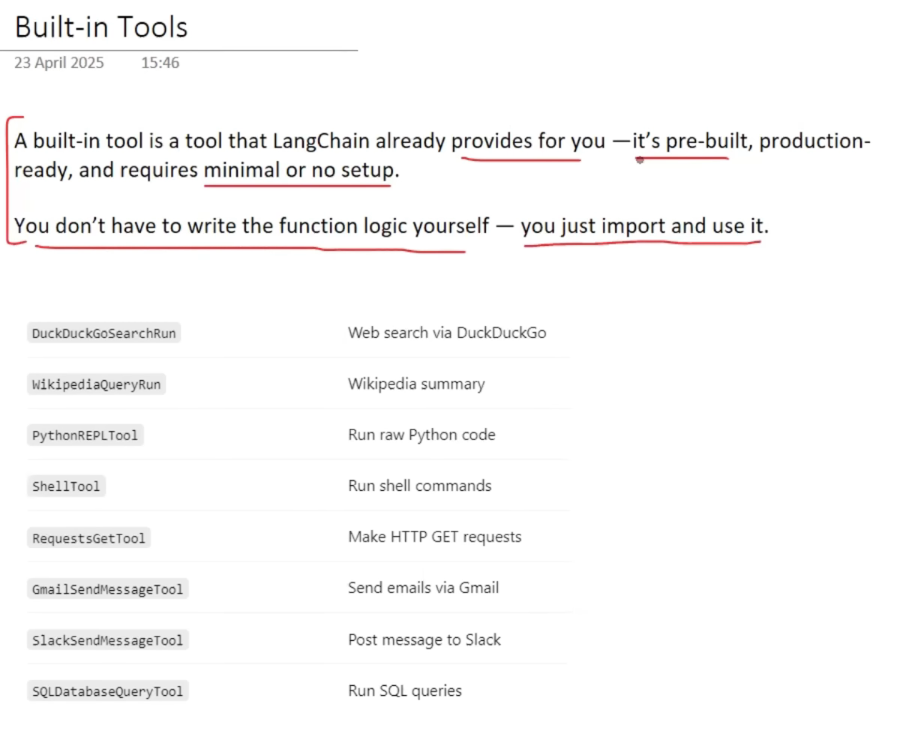



### Context and The Role of Tools

This discussion initiates the third major part of the LangChain playlist, focusing on **building Agents**. Building agents requires a strong understanding of tools, which is the foundational topic,.

**Why LLMs Need Tools:**
LLMs are powerful systems defined by two core capabilities:
1.  **Reasoning and Thinking:** They can understand a question, break it down, and decide how to answer it.
2.  **Language Generation and Speaking:** They can generate word-by-word answers.

However, LLMs cannot perform actions or tasks in the real world. They lack the ability to execute tasks like booking tickets, fetching live weather data, reliably solving complex math problems, running code, calling external APIs, or interacting with databases,. In essence, an LLM is like a body that can think and speak but lacks "hands and legs".

**Definition of a Tool:**
A tool is a mechanism that provides an LLM with the capability to perform a given task. Technically, a tool is a **Python function** containing the execution logic for a task. This function is packaged in a way that the LLM can understand and call it when required. When an LLM receives a task, it uses its reasoning to determine if a tool is needed, calls the tool with the necessary inputs, and the tool executes the task and returns the result to the LLM,.

### Tools and Agents

Tools are crucial for building Agents,. An **AI Agent** is an LLM-powered system that can autonomously think, decide, and take actions using external tools or APIs to achieve a goal.

An Agent’s total capability is a "marriage" of the LLM and the tools:
*   **Reasoning and Decision-Making:** Provided by the **LLM**.
*   **Action Performance:** Powered by the **Tools**.

### Types of Tools in LangChain

LangChain offers two primary categories of tools:

1.  **Built-in Tools:** These are pre-built, production-ready tools created by the LangChain team for common, popular use cases, requiring minimal or no setup,.
    *   **Examples** include DuckDuckGo Search (for web search), Wikipedia Query Run, Python REPL Tool (to run raw Python code), Shell Tool (to execute console commands), Request Get Tool, and SQL Database Query Tool.
    *   **Usage:** Built-in tools are imported (e.g., `DuckDuckGoSearchRun`) and used. Since tools are runnables, their functionality is accessed via the `invoke` function,.

2.  **Custom Tools:** These are created by the user when a built-in tool does not cover a specific, company-unique use case,. Custom tools are necessary for tasks such as calling **proprietary APIs**, encapsulating **business logic unique** to an application, or enabling the LLM to interact with an **existing database or application**,.

### Methods for Creating Custom Tools

LangChain provides multiple ways to build custom tools, all of which are built upon the abstract `BaseTool` class:

#### 1. Using the `@tool` Decorator (The Simplest Method)

This is a three-step process for creating a custom tool,:
1.  **Function Definition:** Define the Python function logic, making sure to include a **docstring**. The docstring is highly recommended as it helps the LLM understand what the function/tool does.
2.  **Type Hinting:** Add type hinting to the function's inputs and outputs. This helps the LLM understand the expected data types.
3.  **Apply Decorator:** Place the `@tool` decorator above the function definition. This makes the function a special tool that can communicate with the LLM.

All tools created this way are runnables and expose key attributes like `name`, `description` (derived from the docstring), and `arguments` (derived from the type hinting). When connecting to an LLM, the tool's **JSON schema** is sent, not the actual function logic,.

#### 2. Using `StructuredTool` and Pydantic

This method allows for a more **strict enforcement of input constraints**, and is often preferred for production-ready agents.
*   The argument structure is explicitly defined using a **Pydantic model** (which inherits from `BaseModel`).
*   The tool is created by calling `StructuredTool.from_function()`, supplying the function, tool name, description, and the Pydantic class as the `argument_schema`,.

#### 3. Inheriting the `BaseTool` Class

`BaseTool` is the abstract base class that defines the structure for all LangChain tools. Directly inheriting this class provides the deepest level of customization.
*   The custom tool is defined as a class that inherits `BaseTool`.
*   The class must define required attributes like `name`, `description`, and `argument_schema` (often using Pydantic),.
*   The class must define the required execution logic inside the `_run` method.
*   This method is necessary if you need to create an **asynchronous version** of the tool to handle concurrency, a feature not available in the other methods.

### Toolkits

A **Toolkit** is a collection of related tools that serve a common purpose, packaged together for convenience and reusability,.

To create a custom toolkit, you define a class (e.g., `MathToolkit`) that includes a `get_tools` method. This method simply returns a list of the tools (e.g., an "Add" tool and a "Multiply" tool) that should be part of the toolkit. This grouping simplifies accessing and managing related functionalities.



---


## 1. What Are Tools in LangChain?

A **Tool** is a controlled interface that allows an LLM to **perform real-world actions**.

LLMs by themselves can:

* Think
* Reason
* Generate text

But they **cannot execute actions**.

Tools give the LLM:

* Access to code execution
* APIs
* Databases
* Search engines
* System commands

### Conceptual Model

```mermaid
flowchart LR
    LLM[LLM Reasoning Engine]
    Tool[Tool: Function/API]
    World[External World]

    LLM -->|decides| Tool
    Tool -->|executes| World
    World -->|returns result| Tool
    Tool -->|output| LLM
```

**Formula:**

```
AI Agent = LLM + Tools + Decision Logic
```

---

## 2. Built-in Tools (Ready to Use)

LangChain provides production-ready tools known as **Runnables**.
All tools expose:

```python
tool.invoke(input)
```

### Example 1: DuckDuckGo Search Tool

```python
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()
result = search_tool.invoke("IPL news")
print(result)
```

✔ Fetches real-time information
✔ No API key required
✔ Used for browsing, retrieval, research

---

### Example 2: Shell Tool (System Commands)

```python
from langchain_community.tools import ShellTool

shell = ShellTool()
print(shell.invoke("ls"))
```

✔ Executes terminal commands
✔ Useful for automation
✔ Requires `langchain-experimental`

---

## 3. Creating Custom Tools (Three Levels)

---

## Method 1: `@tool` Decorator (Simplest)

Best for quick tools.

```python
from langchain_core.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

print(multiply.invoke({"a": 3, "b": 5}))
```

### How it Works

* Docstring → tool description
* Type hints → input schema
* Automatically converted to JSON schema

---

## Method 2: StructuredTool (Production-Ready)

Uses **Pydantic** for strict validation.

```python
from langchain.tools import StructuredTool
from pydantic import BaseModel, Field

class MultiplyInput(BaseModel):
    a: int = Field(description="First number")
    b: int = Field(description="Second number")

def multiply_func(a: int, b: int) -> int:
    return a * b

multiply_tool = StructuredTool.from_function(
    func=multiply_func,
    name="Calculator",
    description="Multiplies two numbers",
    args_schema=MultiplyInput
)
```

### Why Use This?

✔ Input validation
✔ Type safety
✔ Production reliability
✔ Better error handling

---

## Method 3: BaseTool (Maximum Control)

Used for:

* Async execution
* Custom validation
* Tool-level logic

```python
from langchain.tools import BaseTool
from typing import Type
from pydantic import BaseModel

class MultiplyInput(BaseModel):
    a: int
    b: int

class MultiplyTool(BaseTool):
    name = "multiply_tool"
    description = "Multiply two integers"
    args_schema: Type[BaseModel] = MultiplyInput

    def _run(self, a: int, b: int) -> int:
        return a * b
```

Supports:

* `_run()` → sync
* `_arun()` → async
* Custom logging
* Error handling

---

## 4. Toolkits (Grouping Tools)

Toolkits bundle related tools together.

```python
class MathToolkit:
    def __init__(self):
        self.tools = [multiply_tool]

    def get_tools(self):
        return self.tools
```

Used in:

* Agents
* Multi-tool workflows
* Domain-specific assistants

---

## 5. What the LLM Actually Sees

The LLM **never sees Python code**.

It sees only:

```json
{
  "name": "multiply",
  "description": "Multiply two numbers",
  "parameters": {
    "a": "integer",
    "b": "integer"
  }
}
```

Then it decides:

1. Which tool to call
2. What arguments to pass
3. How to use the result

---

## 6. Mental Model (Easy to Remember)

### 🧠 LLM → Brain

### 🛠️ Tools → Hands

### 🤖 Agent → Brain + Hands

```mermaid
graph TD
    A[LLM] --> B[Tool Selection]
    B --> C[Tool Execution]
    C --> D[Result]
    D --> A
```

Without tools → LLM can only **talk**
With tools → LLM can **act**

---

## 7. Summary Table

| Feature          | Purpose               |
| ---------------- | --------------------- |
| `@tool`          | Quick custom tools    |
| `StructuredTool` | Production validation |
| `BaseTool`       | Full control          |
| Built-in tools   | Search, shell, Python |
| Toolkit          | Tool grouping         |
| `.invoke()`      | Tool execution        |

---

## 8. Key Takeaway

**LangChain Tools transform LLMs from text generators into real-world operators.**
They enable:

* Automation
* Decision systems
* AI agents
* Production workflows

Without tools → LLM is a thinker
With tools → LLM becomes an **actor**

---






---

### **1. What a Tool Is**

A **Tool** is a callable function that allows an LLM to perform real-world actions such as:

* Searching the web
* Running code
* Accessing APIs
* Performing calculations

LLMs alone can **think**, not **act**.

---

### **2. Tool = Action Layer**

LLM → decides
Tool → executes

Without tools → text only
With tools → automation possible

---

### **3. Tools Are Runnables**

All tools use:

```python
tool.invoke(input)
```

This makes them compatible with:

* Agents
* Chains
* Workflows

---

### **4. Three Ways to Create Tools**

#### **1. @tool Decorator**

✔ Easiest
✔ Uses docstring + type hints
✔ Best for simple logic

#### **2. StructuredTool**

✔ Uses Pydantic
✔ Input validation
✔ Production-ready

#### **3. BaseTool**

✔ Full control
✔ Supports async
✔ Custom execution logic

---

### **5. Toolkits**

A **Toolkit = collection of related tools**

Used for:

* Modular design
* Reusability
* Large agents

---

### **6. What the LLM Actually Sees**

The LLM does **not** see Python code.

It only sees:

* Tool name
* Description
* Input schema (JSON)

The model decides:

* Which tool to call
* What arguments to pass

---

### **7. Core Formula**

```
AI Agent = LLM + Tools + Reasoning
```

---

### **8. Built-in Tools**

Common examples:

* DuckDuckGoSearch
* Python REPL
* ShellTool
* Wikipedia
* File tools

Used for real-world data access.

---

### **9. Why Tools Matter**

Tools enable:

* Automation
* Real-time data access
* Decision execution
* Agentic workflows

Without tools → chatbot
With tools → AI system

---

### **10. One-Line Memory Hook**

**“LLMs think. Tools act. Agents decide when to act.”**

---




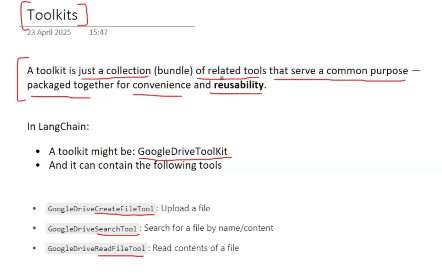